# Maximum Likelihood Estimation

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_cpu.png)

####[MLE-01]
Import modules and set a random seed.

In [1]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers, models

np.random.seed(20190220)
tf.set_random_seed(20190220)

Using TensorFlow backend.


####[MLE-02]
Generate a training dateset.

In [0]:
n0, mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

####[MLE-03]
The training dataset consists of coordinates $(x_1,x_2)$ and label values $t=0,1$.

In [3]:
train_set

,x1,x2,t
0,11.148678,12.178698,0
1,8.628574,16.936525,0
2,6.751810,2.686665,0
3,14.613345,22.415744,1
4,-0.582185,9.712311,0
5,8.720424,20.263025,0
6,14.689335,11.718604,0
7,15.174583,18.703856,1
8,18.932923,20.026993,1
9,10.199965,19.306527,1


####[MLE-04]
Store the coordinates $(x_1,x_2)$ and label values $t$ into NumPy arrays.

In [0]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values

####[MLE-05]
Define a model to predict the probability of `t=1`.

In [5]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(2,),
                       name='logistic_regression'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
logistic_regression (Dense)  (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


####[MLE-06]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

####[MLE-07]
Apply the optimization for 10 epochs.

In [7]:
history = model.fit(train_x, train_t,
                    batch_size=len(train_x), epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
35/35 [==============================] - 0s 3ms/step - loss: 6.8228 - acc: 0.5714
Epoch 2/10
35/35 [==============================] - 0s 104us/step - loss: 6.8224 - acc: 0.5714
Epoch 3/10
35/35 [==============================] - 0s 62us/step - loss: 6.8208 - acc: 0.5714
Epoch 4/10
35/35 [==============================] - 0s 43us/step - loss: 6.8212 - acc: 0.5714
Epoch 5/10
35/35 [==============================] - 0s 60us/step - loss: 6.8193 - acc: 0.5714
Epoch 6/10
35/35 [==============================] - 0s 51us/step - loss: 6.8186 - acc: 0.5714
Epoch 7/10
35/35 [==============================] - 0s 63us/step - loss: 6.8172 - acc: 0.5714
Epoch 8/10
35/35 [==============================] - 0s 55us/step - loss: 6.8172 - acc: 0.5714
Epoch 9/10
35/35 [==============================] - 0s 49us/step - loss: 6.8153 - acc: 0.5714
Epoch 10/10
35/35 [==============================] - 0s 57us/step - loss: 6.8156 - acc: 0.5714


####[MLE-08]
Apply the optimization for additional 5,000 epochs.

In [0]:
history = model.fit(train_x, train_t,
                    batch_size=len(train_x), epochs=5000, verbose=0)

####[MLE-09]
Plot charts for accuracy and loss.

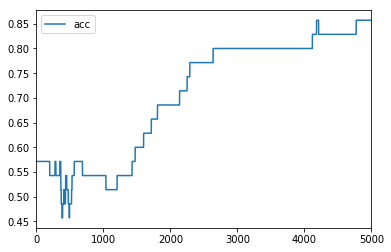

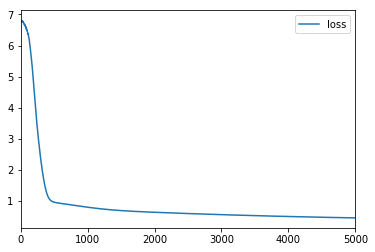

In [9]:
DataFrame({'acc': history.history['acc']}).plot()
DataFrame({'loss': history.history['loss']}).plot()

####[MLE-10]
Show weights after the training.

In [10]:
model.get_weights()

[array([[0.05163707],
        [0.13757119]], dtype=float32), array([-2.8009834], dtype=float32)]

####[MLE-11]
Plot a chart using the final weights to show the result.

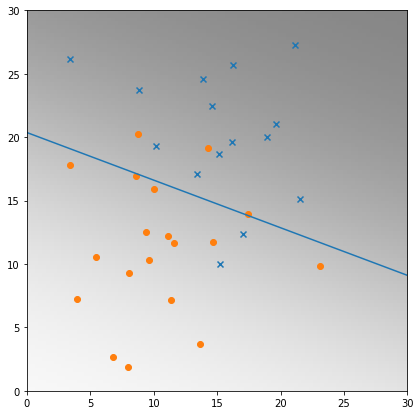

In [11]:
[[w1], [w2]], [b] = model.get_weights()

train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

xs = np.linspace(0, 30, 10)
ys = - (w1*xs/w2 + b/w2)
subplot.plot(xs, ys)

field = [[(1 / (1 + np.exp(-(w1*x1 + w2*x2 + b))))
          for x1 in np.linspace(0, 30, 100)]
         for x2 in np.linspace(0, 30, 100)]
subplot.imshow(field, origin='lower', extent=(0, 30, 0, 30),
               vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.5)